In [85]:
import numpy as np
import pandas as pd
import math as m
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from scipy import *
import scipy.linalg
from scipy.linalg import eig, eigh
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import kneighbors_graph, NearestNeighbors
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

import scaleogram as scg
import matplotlib.pyplot as plt
import warnings

from visuals import *
from my_lib import *
from SSA_lib import SSA

In [109]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [4]:
warnings.simplefilter('ignore')

plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.unicode'] = True
plt.rcParams['figure.figsize'] = 5, 5
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 8

In [170]:
dt = 450*10
#data = pd.read_csv('data/long_walk_100_acc.csv', delimiter =';', decimal=',')[3815+6*455:3815+6*455+dt]
data = pd.read_csv('data/long_walk_100_acc.csv', delimiter =';', decimal=',')[7007:7007+dt]
#data = pd.read_csv('data/long_walk_100_acc.csv', delimiter =';', decimal=',')[3785:8000]
#data = pd.read_csv('data/home_lin_10_lac.csv', delimiter =';', decimal=',')[:]
frecuency = len(data)/(data['time'].values[-1]-data['time'].values[0])
assert 480 < frecuency < 520

x_acc = ( (data['X_value'].values)**2 + (data['Y_value'].values)**2 + (data['Z_value'].values)**2)**.5
_m = np.mean(x_acc)
#x_acc -= _m
t = (data['time'].values).astype(float).reshape([-1,])
t = np.linspace(0,t[-1]-t[0],len(x_acc))

fig = go.Figure()
fig.add_scatter(y = x_acc, mode='lines', name='Sum squares')
fig.show()

In [171]:
accel_ssa = SSA(x_acc, 500)

x_acc_clear = accel_ssa.reconstruct(slice(0,5))

def HankelMatrix(X, L):  
    N = X.shape[0]
    return scipy.linalg.hankel(X[ : N - L + 1], X[N - L : N])

def inverse_HankelMatrix(X, L):  
    N = X.shape[0]
    return scipy.linalg.hankel(X[ : N - L + 1], X[N - L : N])

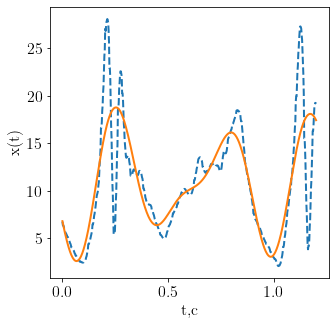

In [172]:
plt.plot(t[1000:1600]-t[1000], x_acc[1000:1600],'--')
plt.plot(t[1000:1600]-t[1000], x_acc_clear[1000:1600])
plt.ylabel('x(t)', size=16)
plt.xlabel('t,c', size=16)
# plt.savefig('/Users/denistikhonov/Desktop/Study/IAD'
#             +'/Research_work/Spherical_Harmonics_parametrisation/doc/figs/tr_init.eps',
#             format='eps',
#             dpi=600,
#             bbox_inches='tight')
plt.show()

In [173]:
X = HankelMatrix(x_acc_clear,500)
X_init = HankelMatrix(x_acc,500)

In [174]:
tsne = TSNE(random_state=0,n_components=3)
X_tsne = tsne.fit_transform(X)

In [175]:
a = -120/180 * np.pi

T_X = np.array([[1,0,0],
                [0,np.cos(a),-np.sin(a)],
                [0,np.sin(a),np.cos(a)]])

T_Y = np.array([[np.cos(a),-np.sin(a),0],
                [np.sin(a),np.cos(a),0],
                [0,0,1]])

T_Z = np.array([[np.cos(a),0,np.sin(a)],
                [0,1,0],
                [-np.sin(a),0,np.cos(a)]])

In [43]:
X_ = X_tsne@T_Y

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 360x360 with 0 Axes>

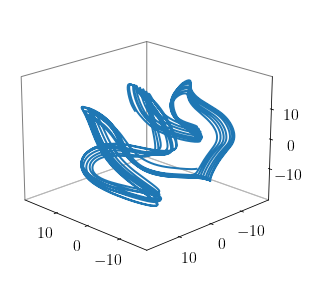

In [44]:
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_[:,0], X_[:,1], X_[:,2], label='parametric curve')

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
#ax.set_zlim(contourz,X_PCA[:,2].max()*1.1)
ax.view_init(elev=20, azim=135)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

fig.savefig('/Users/denistikhonov/Desktop/Study/IAD'
            +'/Research_work/Spherical_Harmonics_parametrisation/doc/figs/phase_tsne.eps',
            format='eps',
            dpi=600)

In [11]:
fig_2 = go.Figure()

fig_2.add_trace(go.Scatter3d(x=X_tsne[:,0],
                             y=X_tsne[:,1],
                             z=X_tsne[:,2],
                             #mode='markers',
                             marker=dict(
                                 size=np.ones(len(X_tsne[:,0]))*10,
                                 sizemode='diameter'
                             )
                            )
                )


fig_2.layout.template = 'plotly_white'
fig_2.show()

In [12]:
pca = PCA(n_components=3)
X_PCA = pca.fit_transform(X)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


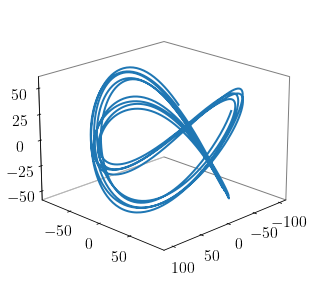

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_PCA[:2000,0],
        X_PCA[:2000,1],
        X_PCA[:2000,2],
        label='parametric curve')

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
#ax.set_zlim(contourz,X_PCA[:,2].max()*1.1)
ax.view_init(elev=20, azim=45)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

fig.savefig('/Users/denistikhonov/Desktop/Study/IAD'
            +'/Research_work/Spherical_Harmonics_parametrisation/doc/figs/phase_init.eps',
            format='eps',
            dpi=600)

In [176]:
X_inverse = pca.inverse_transform(X_PCA)

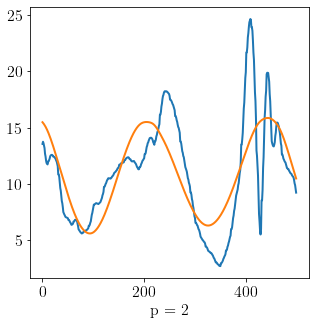

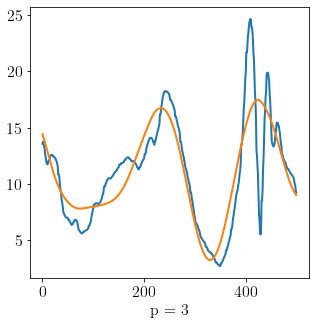

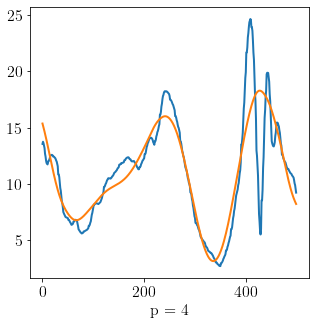

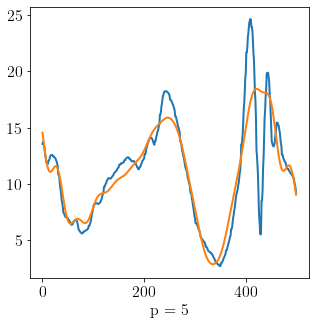

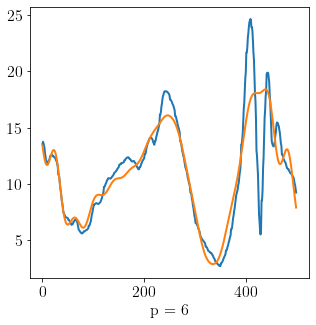

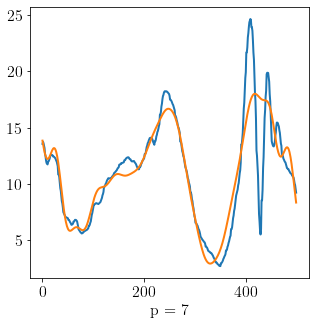

In [177]:
mape = []
mse = []
for i in range(2,8):
    pca = PCA(n_components=i)
    pca.fit(X_init[:3000])
    X_PCA =  pca.transform(X_init[3000:])
    
    X_inverse = pca.inverse_transform(X_PCA)
    
    mape.append(MAPE(X[3000:],X_inverse))
    mse.append(mean_squared_error(X[3000:],X_inverse))
#     mae.append()
    
    plt.plot(X_init[3000,:])
    plt.plot(X_inverse[0,:])
    plt.xlabel('p = '+str(i), size=16)
    plt.show()

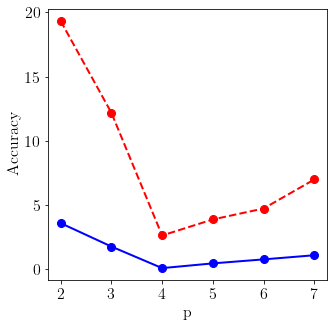

In [179]:
plt.plot(range(2,8),mape,'ro')
plt.plot(range(2,8),mape,'r--')

plt.plot(range(2,8),mse,'bo')
plt.plot(range(2,8),mse,'b-')

plt.ylabel('Accuracy', size=16)
plt.xlabel('p', size=16)
plt.xticks(range(2,8))
plt.show()

In [145]:
mape = []
mse = []
for i in range(2,10):
#     pca = PCA(n_components=i)
#     X_PCA = pca.fit_transform(X)
#     X_inverse = pca.inverse_transform(X_PCA)
    pca = KernelPCA(n_components=i,
                    kernel='cosine',
                    fit_inverse_transform=True)
    pca.fit(X[:3000])
    X_PCA =  pca.transform(X[3000:])
    
    X_inverse = pca.inverse_transform(X_PCA)
    
    mape.append(MAPE(X[3000:],X_inverse))
    #mse.append(mean_squared_error(X, X_inverse))

In [146]:
(np.array(mape)).round(2)

array([2284.8 , 1416.41,  384.62,  353.01,  346.19,  340.39,  331.09,
        325.53])

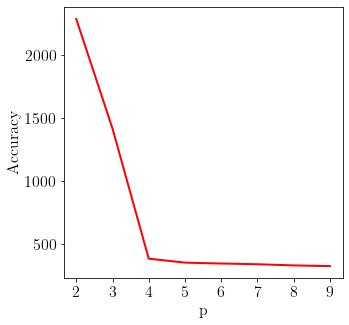

In [147]:
plt.plot(range(2,10),mape,'r-')
plt.ylabel('Accuracy', size=16)
plt.xlabel('p', size=16)
plt.xticks(range(2,10))
plt.show()

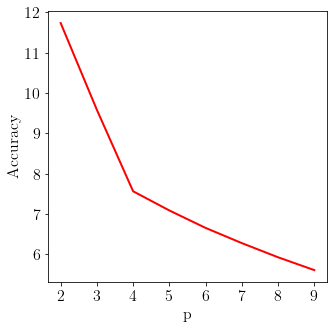

In [124]:
plt.plot(range(2,10),mse,'r-')
plt.ylabel('Accuracy', size=16)
plt.xlabel('p', size=16)
plt.xticks(range(2,10))
plt.show()

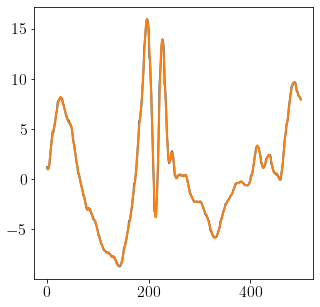

In [77]:
plt.plot(X_init[0,:])
plt.plot(X_inverse[0,:])

In [134]:
X.shape

(4001, 500)

In [135]:
MAPES = []
for i, kernel in enumerate(['cosine', 'poly', 'rbf', 'sigmoid']):
    temp = [kernel]
    for n_comp in range(2,8):
        try:
            transformer = KernelPCA(n_components=n_comp, kernel=kernel,fit_inverse_transform=True)
            X_transformed = transformer.fit_transform(X)
            temp.append(MAPE(X,transformer.inverse_transform(X_transformed)))
        except:
            temp.append('-')
    MAPES.append(temp)

In [136]:
MAPES

[['cosine',
  6.283006145582436e-11,
  3.6368049144989973e-11,
  6.749119348947191e-12,
  6.139004675097876e-12,
  5.526486299677233e-12,
  5.3960881520155185e-12],
 ['poly',
  0.12172869252913769,
  0.027359777926929015,
  0.00211892427846272,
  0.0009845478061743338,
  0.0003858291871211574,
  0.00020915110983074208],
 ['rbf',
  1.2716215396634724e-10,
  9.987478566924309e-11,
  9.20111835730862e-11,
  6.004620626978831e-11,
  4.7329083502731225e-11,
  3.9677815379662826e-11],
 ['sigmoid', '-', '-', '-', '-', '-', '-']]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

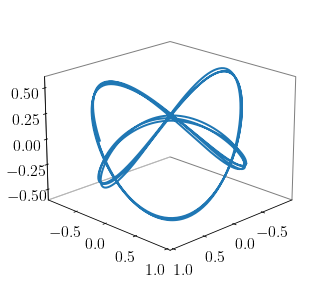

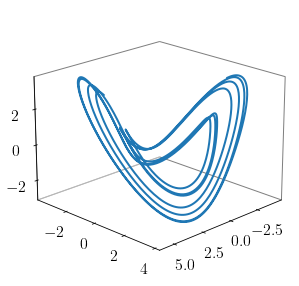

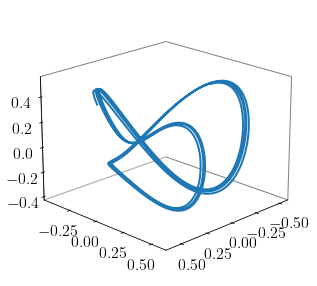

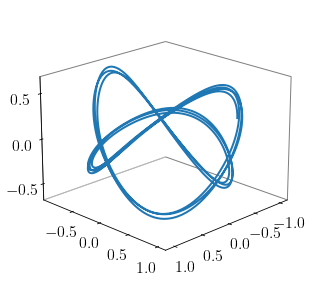

In [14]:
for i, kernel in enumerate(['cosine', 'poly', 'rbf', 'sigmoid']):
    transformer = KernelPCA(n_components=3, kernel=kernel, gamma = 1/len(X))

    X_transformed = transformer.fit_transform(X[:1500])
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(X_transformed[:,0],
            X_transformed[:,1],
            X_transformed[:,2],
            label='parametric curve')

    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.view_init(elev=20, azim=45)

    ax.grid(False)
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    fig.savefig('/Users/denistikhonov/Desktop/Study/IAD'
                +'/Research_work/Spherical_Harmonics_parametrisation/doc/figs/phase_'
                + kernel +'.eps',
                format='eps',
                dpi=600)




# Spherical

In [15]:
def CartesianToSpherical(point):
    r = np.sqrt(sum(point ** 2))
    n = len(point)
    phi = np.zeros(n - 1)
    
    for i in range(n - 2):
        phi[i] = np.arccos(point[i] / np.sqrt(sum(point[i:] ** 2)))
        
    if point[-1] >= 0:
        phi[n - 2] = np.arccos(point[n - 2] / np.sqrt(point[n - 1] ** 2 + point[n - 2] ** 2))
    else:
        phi[n - 2] = 2 * np.pi - np.arccos(point[n - 2] / np.sqrt(point[n - 1] ** 2 + point[n - 2] ** 2))
        
    return np.hstack((phi, r))


def TrajectoryToSpherical(tr):
    tr_spherical = np.zeros(tr.shape)
    for i, point in enumerate(tr):
        tr_spherical[i] = CartesianToSpherical(point)
    return tr_spherical


def SphericalToCartesian(point):
    phi, r = point[:-1], point[-1]
    n = len(point)
    x = np.zeros(n) 
    cur = r
    
    for i in range(n - 1):
        x[i] = cur * np.cos(phi[i])
        cur *= np.sin(phi[i])

    x[n - 1] = cur
    return x
    

def TrajectoryToCartesian(tr):
    tr_cartesian = np.zeros(tr.shape)
    for i, point in enumerate(tr):
        tr_cartesian[i] = SphericalToCartesian(point)
    return tr_cartesian

In [16]:
X_spherical = TrajectoryToSpherical(X)

In [21]:
X_ = X_spherical[:-1]

pca = PCA(n_components=3)
X_temp = pca.fit_transform(X_)

X_SPH = np.concatenate((X_temp,np.ones((len(X_temp),1))),axis = 1)

In [34]:
X_car = TrajectoryToCartesian(X_SPH)

"fig.savefig('/Users/denistikhonov/Desktop/Study/IAD'\n            +'/Research_work/Spherical_Harmonics_parametrisation/doc/figs/phase_init.eps',\n            format='eps',\n            dpi=600)"

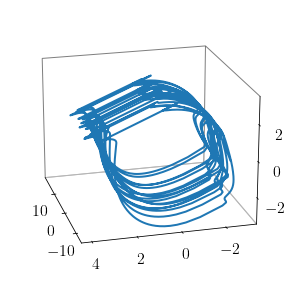

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_temp[:,0], X_temp[:,1], X_temp[:,2], label='parametric curve')

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
#ax.set_zlim(contourz,X_PCA[:,2].max()*1.1)
ax.view_init(elev=20, azim=165)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

"""fig.savefig('/Users/denistikhonov/Desktop/Study/IAD'
            +'/Research_work/Spherical_Harmonics_parametrisation/doc/figs/phase_init.eps',
            format='eps',
            dpi=600)"""

In [40]:
fig_2 = go.Figure()

fig_2.add_trace(go.Scatter3d(x=X_temp[:,0],
                             y=X_temp[:,1],
                             z=X_temp[:,2],
                             marker=dict(size=0.1,
                                         line=dict(width=0.01)
                                        ),
                            )
                )


fig_2.layout.template = 'plotly_white'
fig_2.show()